# More Clustering Algorithms

Recall the concentric circle toy data that we studied last time, which we recreate below.

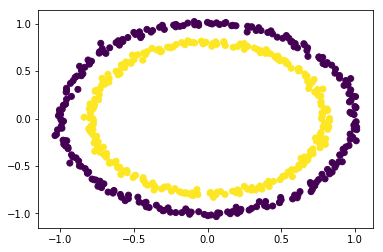

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

X1, y1 = make_circles(n_samples=500, noise = 0.02, random_state = 3)
plt.scatter(X1[:,0],X1[:,1],c=y1)
plt.show()

We saw that $k$-Means did a terrible job at clustering the concentric circles data. This also makes sense intuitively: the mean of each ring is roughly at the origin! Let's double check this by running $k$-Means clustering with $k=2$. 

We could use the function in `scikit-learn`, but for fun let's use the $k$-Means algorithm that we wrote previously. The issue is that our algorithm was written in a different notebook! It would be annoying if we had to search through the other notebook to copy and paste the necessary functions into this one. We'll take this opportunity to see how to load in a function from a `.py` file. 

#### Loading Our $k$-Means Function

If you look in the directory containing this notebook, there is a folder called "code". Inside is a file called `kmeans.py`. Go ahead and take a look at it now...

You should see that it contains exactly the $k$-Means functions that we wrote last time. We can load these functions into the notebook as follows. Note that certain terminal commands work in Jupyter notebooks!

In [3]:
ls

01IntroductionToPython.ipynb
02RandomnessAndBasicStatistics.ipynb
03WorkingWithData.ipynb
04DictionariesAndWorkingWithText.ipynb
05PandasAndDataVisualization.ipynb
06LinearRegression.ipynb
07PolynomialAndLogisticRegression.ipynb
08MulticlassClassification.ipynb
09SupervisedLearning.ipynb
10PrincipalComponentAnalysis.ipynb
11DimensionReduction.ipynb
12Clustering.ipynb
13MoreClustering.ipynb
NeedhamBootcampSyllabus.pdf
README.md
code/
data/
notebooksWithSolutions/


In [4]:
cd code/

/Users/Tom/Documents/Python-Bootcamp-2019/code


In [5]:
ls

__pycache__/                   plot_classifier_comparison.py
circlesExampleScript.py        plot_cluster_comparison.py
kmeans.py


Now that we are in the `code` directory, we can load in our `kMeans` function from the python file `kmeans.py` using standard syntax.

In [6]:
from kmeans import kMeans

Let's go back to our original directory.

In [7]:
cd ..

/Users/Tom/Documents/Python-Bootcamp-2019


And let's see if `kMeans` will run.

Iterations to converge:  5


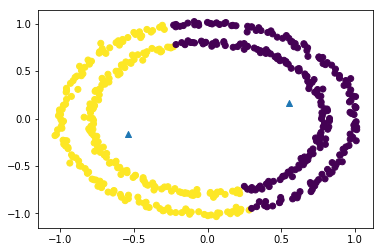

In [8]:
centers, labels = kMeans(X1,2)

plt.scatter(X1[:,0],X1[:,1],c=labels)
plt.scatter(centers[:,0],centers[:,1],marker = '^')

Alright, the function works like it did yesterday (i.e., gives a bad result!).

We could also import the whole package and use any function in it.

In [9]:
cd code/

/Users/Tom/Documents/Python-Bootcamp-2019/code


In [10]:
import kmeans as km

In [11]:
cd ..

/Users/Tom/Documents/Python-Bootcamp-2019


In [12]:
km.cluster_centers(X1,3)

array([[ 0.92762615, -0.35861171],
       [-0.34804405, -0.91334316],
       [-0.53753233, -0.80770744]])

As a final note on this theme, if you want to do more involved stuff with different directories or if you are working with Python in the terminal, you should import the module `os`. 

In [13]:
# Import the package
import os

# Example function - 'get current working directory'
os.getcwd()

'/Users/Tom/Documents/Python-Bootcamp-2019'

Some other useful functions:

`os.chdir('path')` changes current current working directory to `path`

`os.listdir()` lists files and subdirectories in the current directory

## DBSCAN

Our goal is to find a clustering algorithm which will cluster the concentric circles example 'correctly'. One candidate is *DBSCAN (Density-based spatial clustering of applications with noise)*. 

The algorithm is described as follows.

#### Input Data

We begin with a dataset $X = \{\vec{x}_1,\ldots,\vec{x}_n\}$, each $\vec{x}_j \in \mathbb{R}^d$, which we would like to cluster. 

#### Parameter Selection

Like $k$-Means, there is some parameter selection involved in DBSCAN. Here we choose a small radius $\epsilon > 0$ and a positive integer `minPoints`.

#### The Algorithm

We say $\vec{x} \in X$ is a *core point* if there are `minPoints` elements of $X$ within distance $\epsilon$ from it.

Another $\vec{y} \in X$ is said to be *reachable* from a core point $\vec{x}$ if there is a chain of core points $\vec{x} = \vec{x}_{j_1}, \vec{x}_{j_2}, \ldots, \vec{x}_{j_\ell} = \vec{y}$ such that the distance between consective linkes in the chain is less than $\epsilon$. 

Each cluster of DBSCAN contains a core point and all points which are reachable from it.

**Remarks:** 
- The number of clusters is not set beforehand. Rather, it is determined by the data.
- Some datapoints may not belong to any cluster; these are called *noise points*. 
- There is a need to tune parameters $\epsilon$ and `minPoints` (especially $\epsilon$!).

Let's run it on some new toy data.

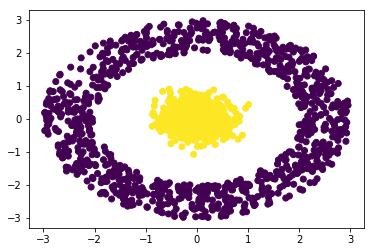

In [14]:
import numpy as np
count = 1000
angles = np.random.uniform( 0, 2*np.pi, count )
ring = np.array([np.sin( angles ), np.cos( angles )]) * np.random.uniform(2,3,count)
ring = ring.transpose()
blob = np.random.normal(0,0.3,size=(count,2))

y = np.repeat([0,1],count)
X = np.vstack( [ring,blob] )

plt.scatter( X[:,0], X[:,1],c=y )
plt.show()

First let's try clustering with $k$-Means. By its nature, we should expect that it doesn't work too well.

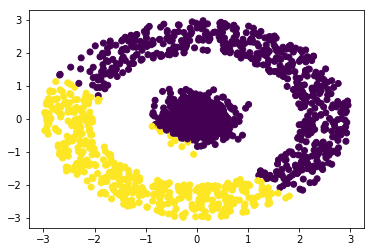

In [15]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2).fit(X)
plt.scatter( X[:,0], X[:,1],c=kmeans.labels_ )
plt.show()

Our expectation panned out. Now let's try DBSCAN, which is included in `scikit-learn`. If we don't specify parameters, $\epsilon$ and `minPoints` are set to default values.

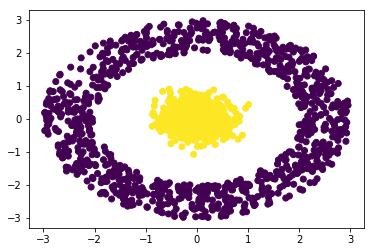

In [16]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN().fit(X)
plt.scatter( X[:,0], X[:,1],c=dbscan.labels_ )
plt.show()

It works!

### Exercise

1) Try running `DBSCAN` on the concentric circles dataset `X1` from above. How well does it do?

2) `DBSCAN` has lots of options; dig through the documentation to see if you can get it to cluster `X1` correctly https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html. 

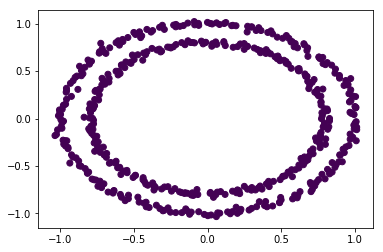

In [18]:
dbscan = DBSCAN().fit(X1)
plt.scatter( X1[:,0], X1[:,1],c=dbscan.labels_ )
plt.show()

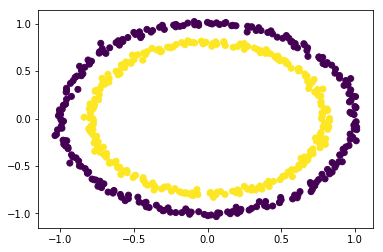

In [31]:
dbscan = DBSCAN(eps=0.1, min_samples = 5).fit(X1)
plt.scatter( X1[:,0], X1[:,1],c=dbscan.labels_ )
plt.show()

In [32]:
dbscan.labels_

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,

### Exercise

Experiment with DBSCAN on the datasets `X2`, `X3`, `X4`, `X5` defined below. In particular, try using different values of `eps`. What happens if you make `eps` super small? 

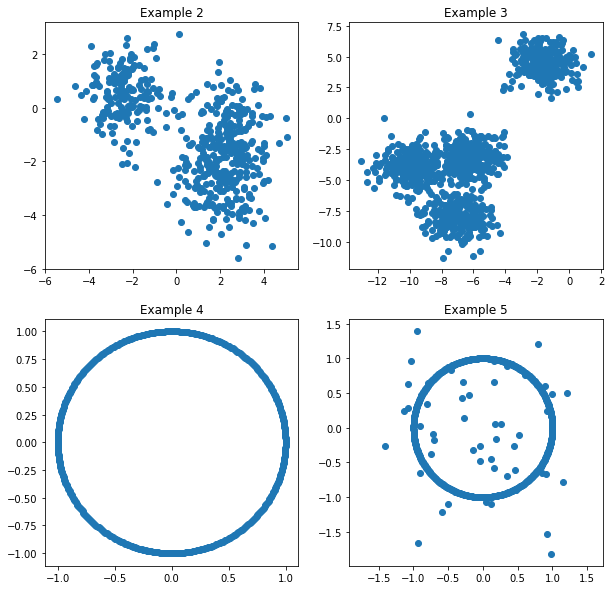

In [33]:
from sklearn.datasets import make_blobs

X2, y2 = make_blobs(n_samples=500, center_box=(-3,3), centers=3, random_state=6)


X3, y3 = make_blobs(n_samples=1000, centers=4, random_state=1)

xs = np.linspace(0,2*np.pi,500)
X4 = np.array([np.cos(xs),np.sin(xs)]).T

from sklearn.datasets import make_circles
X5 = np.append(X4, np.random.multivariate_normal(np.array([0,0]), 0.5*np.array([[1,0],[0,1]]), 50), axis=0)

fig = plt.figure(figsize=(10,10))

p1 = fig.add_subplot(2,2,1)
p1.scatter(X2[:,0],X2[:,1])
plt.title('Example 2')

p2 = fig.add_subplot(2,2,2)
p2.scatter(X3[:,0],X3[:,1])
plt.title('Example 3')

p3 = fig.add_subplot(2,2,3)
p3.scatter(X4[:,0],X4[:,1])
plt.title('Example 4');

p4 = fig.add_subplot(2,2,4)
p4.scatter(X5[:,0],X5[:,1])
plt.axis('equal')
plt.title('Example 5');

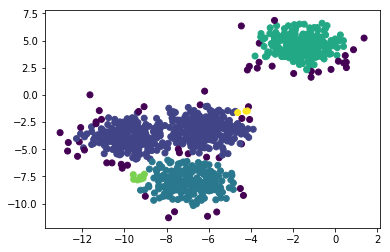

In [57]:
A = X3

dbscan = DBSCAN(eps=0.5).fit(A)
plt.scatter( A[:,0], A[:,1],c=dbscan.labels_ )
plt.show()

In [47]:
dbscan.labels_

array([ 0,  1,  2,  3,  1,  3,  3,  3,  2,  0,  0,  3,  2,  2, -1,  3,  3,
        0,  3,  1,  0,  3,  0,  2,  0,  3,  1, -1,  2, -1,  1,  1,  1,  1,
        2,  2,  2,  2,  0,  0, -1,  2,  0,  3,  1,  1,  3,  4,  1,  1,  2,
       -1,  3,  0, -1,  3,  3,  0,  1,  2,  1,  1,  3, -1,  0,  2,  2,  2,
        2,  1,  3,  1,  3,  3,  1,  2,  3, -1,  2,  3,  1,  1,  0,  2,  2,
        0,  2,  1,  2,  3,  1, -1,  3,  2,  3,  3,  2,  0,  3,  0,  3,  1,
        2,  3,  0,  3,  0,  3,  3,  2,  3,  3,  0,  2,  1,  3,  2,  3,  0,
        0,  3, -1,  3,  3, -1, -1,  2,  1,  2,  2,  2,  0,  2, -1,  5,  3,
       -1, -1,  1,  3,  1,  0,  3,  3, -1,  2,  3,  0,  0,  1,  0, -1,  1,
        2,  0,  3,  0,  0, -1,  1,  1,  3, -1, -1,  0,  0, -1, -1, -1,  3,
        0,  0,  1,  1,  0,  0,  3,  3,  1,  1,  0,  1,  3,  0,  1,  2,  1,
        3, -1,  2,  2,  1,  3,  1,  3, -1,  0,  0,  2,  3,  3,  1,  1,  0,
        3,  3,  0,  2,  0,  2,  3,  2,  6, -1,  1, -1, -1,  2, -1, -1,  3,
        1,  1,  3,  2,  1

### Choosing $\epsilon$

We are now faced with the question of how to choose $\epsilon$ and `minPoints` in an unsupervised context (where we can't just *look* at the data). As with choosing $k$ in the $k$-Means algorithm, this is not an exact science. We can once again try to do an "elbow analysis". Suppose we have fixed `minPoints` (heuristically, this is the minimum size of cluster that we will accept). It is suggested in the literature to look for an elbow in the histogram of $k$NN distances, with $k =$ `minPoints`.

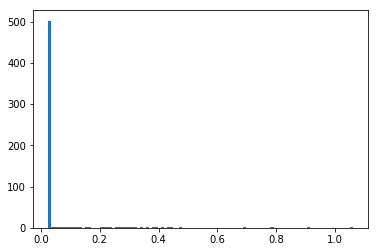

In [60]:
from sklearn.neighbors import NearestNeighbors

# Compute kNN distances
nbrs = NearestNeighbors(n_neighbors=5).fit(X5)
distances, indices = nbrs.kneighbors(X5)

# Look at the last column of distances
eps_dist = distances[:,-1]

# Plot the histogram
plt.hist(eps_dist,bins=100)
plt.show();

## Hierarchical Clustering

What if we tried to do something like DBSCAN, but didn't fix an $\epsilon$ parameter? Instead, we could look at all values of $\epsilon$ and see how the clustering behavior changes over them. This is the perspective of *hierarchical clustering*, where the data isn't partitioned into one fixed partition, but is instead clustered in a 'multiscale' fashion. Basically, we start with the discrete data set partitioned into singleton sets, then join partition sets over time to form coarser and coarser clusters.

Let's take a look at a simple example.

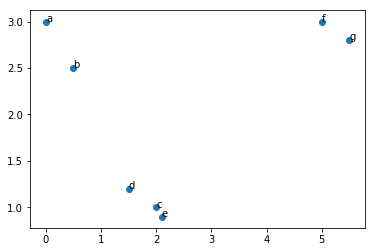

In [61]:
X = np.array([[0,3],[0.5,2.5],[2,1],[1.5,1.2],[2.1,0.9],[5,3],[5.5,2.8]])
y = ['a','b','c','d','e','f','g']
plt.scatter(X[:,0],X[:,1])
for i in range(7):
    plt.annotate(y[i], (X[i,0], X[i,1]))
plt.show();

We perform hierarchical clustering using the `linkage` function. The result can be displayed as a visualization called a *dendrogram*. Note the function comes from another package called `scipy`.

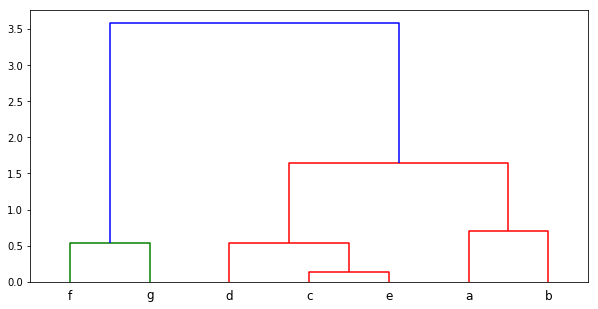

In [62]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage  

plt.figure(figsize=(10,5))
linked = linkage(X)
dendrogram(linked, labels=y)
plt.show()

Intuitively, this should look like a reasonable visual description of the multiscale clustering of the data.

#### Mathematical Formulation

This version of a dendrogram is described by the following rule. Points $\vec{x}$ and $\vec{y}$ in our dataset are joined in the dendrogram below height $\epsilon$ if and only if there is a chain of data points $\vec{x} = \vec{x}_1,\vec{x}_2,\ldots,\vec{x}_n = \vec{y}$ such that each consective pair of links $\vec{x}_i$ and $\vec{x}_{i+1}$ is within distance $\epsilon$. 

There are several related algorithms for building dendrograms. One great thing about hierarchical clustering is that it is very flexible; in fact, the algorithm outlined above makes sense in general metric spaces.

If we want to get really fancy: the map taking a dataset to its dendrogram is a functor from the category of finite metric spaces to the category of finite ultrametric spaces which is stable with respect to Gromov-Hausdorff distance.

## More Examples

Let's try it on our 'concentric circles' data.

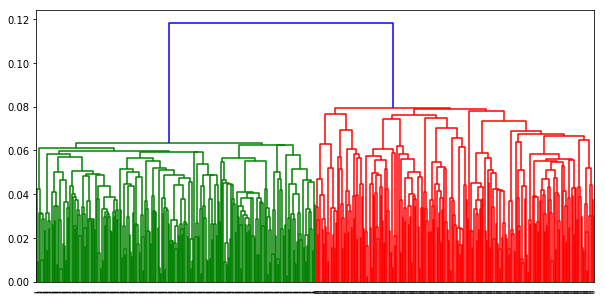

In [63]:
plt.figure(figsize=(10,5))
linked = linkage(X1)
dendrogram(linked, labels=y1)
plt.show()

Looks like two clusters! But are they really corresponding to the two circles? We can apply `AgglomerativeClustering` from `scikit-learn` to extract the points in the two big clusters. This clustering algorithm requires a choice of number of clusters `n_clusters`, then it slices the dendrogram into the `n_clusters` most prominent clusters. The benefit here is that the choice of `n_clusters` is much more clear than in the $k$-Means algorithm. 

In [64]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=2, linkage = 'single')
ac.fit(X1)
ac.labels_

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,

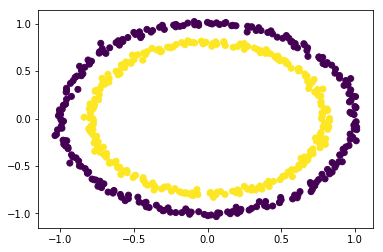

In [65]:
plt.scatter(X1[:,0],X1[:,1],c=ac.labels_);

It worked! Interestingly, if we increase the number of clusters the algorithm picks out the 'connected pieces' of the circles.

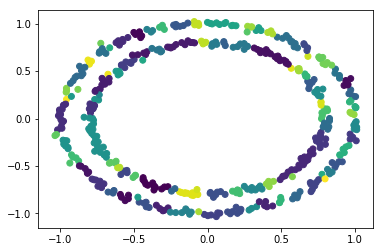

In [69]:
ac = AgglomerativeClustering(n_clusters=100, linkage = 'single')
ac.fit(X1)
plt.scatter(X1[:,0],X1[:,1],c=ac.labels_);

There are lots of options for hierarchical clustering. In particular, dendrograms can be created via different algorithms; see https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.linkage.html. Similar options are available for Agglomerative clustering https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html. Performance of each method will depend on the data.

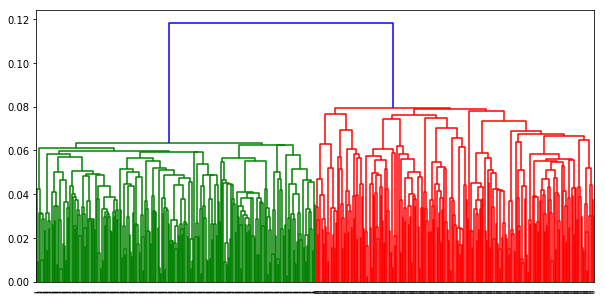

In [72]:
plt.figure(figsize=(10,5))
linked = linkage(X1, 'single')
dendrogram(linked, labels=y1)
plt.show()

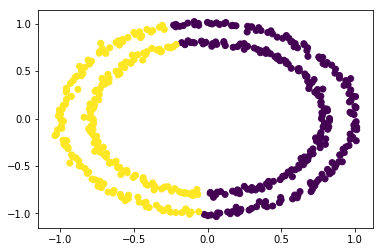

In [74]:
ac = AgglomerativeClustering(n_clusters=2)
ac.fit(X1)
plt.scatter(X1[:,0],X1[:,1],c=ac.labels_);

**Remark:** The default linkage type for `AgglomerativeClustering` is `ward`, which gives a bad result here. Playing with the options for any particular application is important!

## Hierarchical Clustering on MNIST

Dendrogram visualizations tend to not be very readable for large numbers of datapoints. Let's look at the clustering behavior on a random collection of points in MNIST.

In [75]:
from sklearn.datasets import load_digits
MNIST, MNISTlabels = load_digits(return_X_y = True)

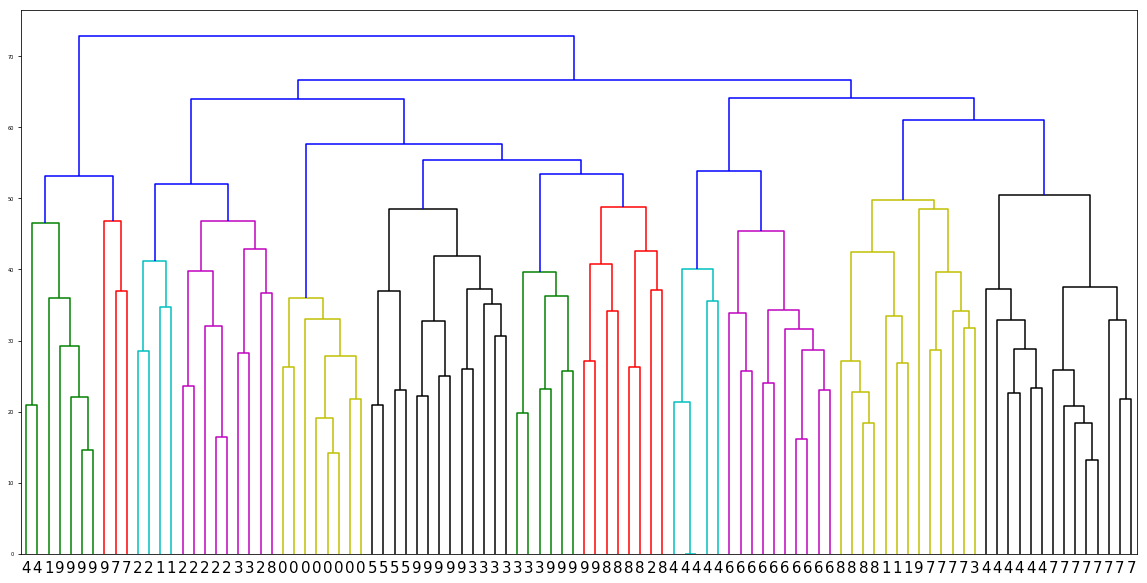

In [83]:
r = np.random.choice(len(MNIST),size=100)
smallMNIST = MNIST[r]
smallMNISTlabels = MNISTlabels[r]

linked = linkage(smallMNIST,'complete')

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 1, 1)
dendrogram(linked, ax=ax, labels=smallMNISTlabels)
ax.tick_params(axis='x', which='major', labelsize=15, rotation=0)
ax.tick_params(axis='y', which='major', labelsize=5)

Alternatively, we could cluster all of the points in MNIST, but change display settings in the dendrogram. Available options can be seen here: https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html

In [85]:
linked_complete = linkage(MNIST,'complete')

In [86]:
linked_ward = linkage(MNIST,'ward')

In [87]:
linked_single = linkage(MNIST,'single')

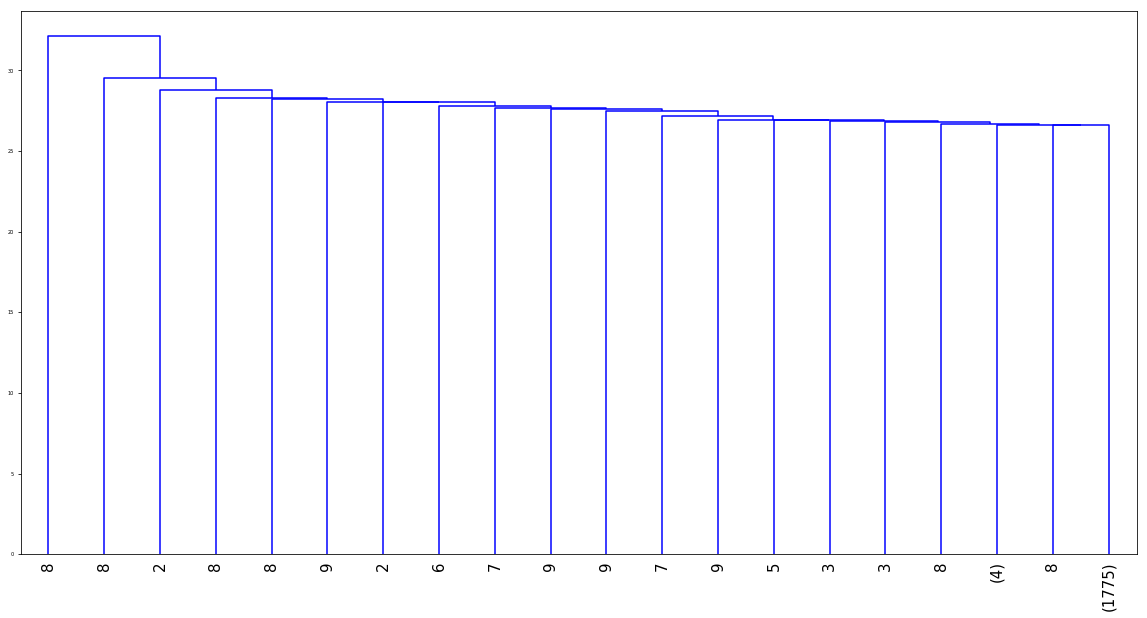

In [94]:
# Create a dictionary to make it easier to change display settings
linkages = {'complete':linked_complete,'ward':linked_ward,'single':linked_single}

linkage_type = 'single'
truncate_type = 'lastp'

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 1, 1)
dendrogram(linkages[linkage_type], ax=ax, labels=MNISTlabels, p=20, truncate_mode = truncate_type)
ax.tick_params(axis='x', which='major', labelsize=15, rotation=90)
ax.tick_params(axis='y', which='major', labelsize=5)

## Hierarchical Clustering on Stock Data

Let's take a look at the hierarchical clustering behavior of some stock data. The code below shows how to read in multiple files from a folder into the same variable.

In [95]:
import os, json
# Create a list of file names for files in the stocks folder
files = [f for f in os.listdir('data/stocks') if f.endswith('.json')]

data = {} # Create an empty dictionary
symbols = [] # Create an empty list
for name in files:
    with open(os.path.join('data/stocks/', name),'r') as f:
        d = json.load(f) # Load each file
        symbol = d['Meta Data']['2. Symbol'] # Pull off the stock symbol and add to the list
        symbols.append( symbol )
        data[ symbol ] = d['Time Series (Daily)'] # Get the time series for the symbol

In [96]:
files

['AAPL.json',
 'AMZN.json',
 'F.json',
 'FB.json',
 'GM.json',
 'GOOG.json',
 'HMC.json',
 'NFLX.json',
 'TM.json']

These are stocks for Apple, Amazon, Ford, Facebook, General Motors, Google, Honda, Netflix and Toyota.

In [97]:
data['AAPL']

{'2019-05-17': {'1. open': '186.9300',
  '2. high': '190.9000',
  '3. low': '186.7600',
  '4. close': '189.0000',
  '5. adjusted close': '189.0000',
  '6. volume': '32879090',
  '7. dividend amount': '0.0000',
  '8. split coefficient': '1.0000'},
 '2019-05-16': {'1. open': '189.9100',
  '2. high': '192.4689',
  '3. low': '188.8400',
  '4. close': '190.0800',
  '5. adjusted close': '190.0800',
  '6. volume': '33031364',
  '7. dividend amount': '0.0000',
  '8. split coefficient': '1.0000'},
 '2019-05-15': {'1. open': '186.2700',
  '2. high': '191.7500',
  '3. low': '186.0200',
  '4. close': '190.9200',
  '5. adjusted close': '190.9200',
  '6. volume': '26544718',
  '7. dividend amount': '0.0000',
  '8. split coefficient': '1.0000'},
 '2019-05-14': {'1. open': '186.4100',
  '2. high': '189.7000',
  '3. low': '185.4100',
  '4. close': '188.6600',
  '5. adjusted close': '188.6600',
  '6. volume': '36529677',
  '7. dividend amount': '0.0000',
  '8. split coefficient': '1.0000'},
 '2019-05-13

We see that `data` is a dictionary. Each key is a stock name, and the value for each key is recent daily stock data. Let's study the 'close' price as a time series. This is still pretty hard to parse, so let's convert it to a `pandas` data frame.


In [99]:
import pandas as pd

# Start with a column containing dates
market = pd.DataFrame(columns=['date'])

for symbol in data.keys():
    # Add dates in a standard format
    dates = pd.DataFrame( pd.to_datetime( list(data[symbol].keys()) ), columns=['date'] )
    # Pull off closing prices
    closes = pd.DataFrame( [float(x['5. adjusted close']) for x in data[symbol].values()], columns=[symbol] )
    # Create dataframe of dates and closes for the current symbol
    df = pd.DataFrame( pd.concat( [dates, closes], axis=1 ) )
    # Merge with the main dataframe
    market = market.merge( df, how='outer' )

In [100]:
market.head()

,date,AAPL,AMZN,F,FB,GM,GOOG,HMC,NFLX,TM
0,2019-05-17,189.00,1869.00,10.29,185.30,37.00,1162.30,25.63,354.45,118.40
1,2019-05-16,190.08,1907.57,10.40,186.99,37.38,1178.98,25.77,359.31,119.90
2,2019-05-15,190.92,1871.15,10.36,186.27,37.37,1164.21,25.83,354.99,120.64
3,2019-05-14,188.66,1840.12,10.24,180.73,37.04,1120.44,25.62,345.61,119.07
4,2019-05-13,185.72,1822.68,10.08,181.54,36.56,1132.03,25.42,345.26,118.26


Now create a numpy array for computations. We don't really have a use for the dates.

In [106]:
import numpy as np
prices = market.drop('date',axis=1)
symbols = list(prices.columns)
X = np.array([prices[s] for s in symbols])

In [102]:
prices.head()

,AAPL,AMZN,F,FB,GM,GOOG,HMC,NFLX,TM
0,189.00,1869.00,10.29,185.30,37.00,1162.30,25.63,354.45,118.40
1,190.08,1907.57,10.40,186.99,37.38,1178.98,25.77,359.31,119.90
2,190.92,1871.15,10.36,186.27,37.37,1164.21,25.83,354.99,120.64
3,188.66,1840.12,10.24,180.73,37.04,1120.44,25.62,345.61,119.07
4,185.72,1822.68,10.08,181.54,36.56,1132.03,25.42,345.26,118.26


Let's take a look at the stock prices.

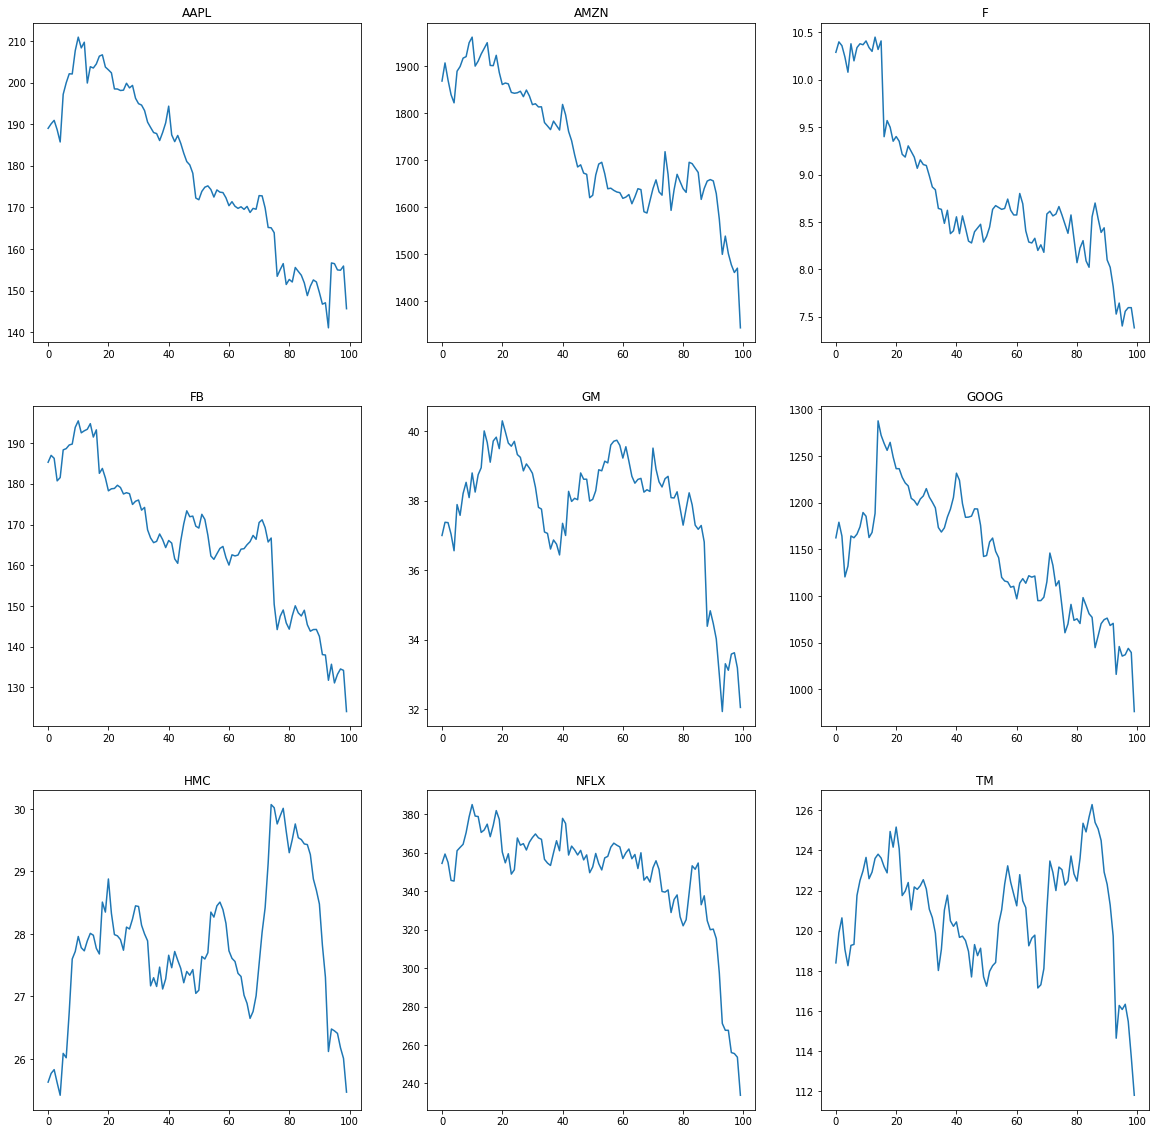

In [107]:
fig = plt.figure(figsize=(20,20))

for j in range(9):
    fig.add_subplot(3,3,j+1)
    plt.plot(X[j,:])
    plt.title(list(data.keys())[j])

plt.show()

Now we can cluster the stocks.

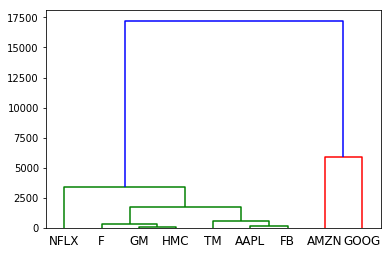

In [111]:
linked = linkage(X, 'complete')
dendrogram(linked, labels=symbols)
plt.show();

### Exercise

This result is not too informative. We are computing distances between the time series by thinking of them as vectors in $\mathbb{R}^{100}$. Notice that the stock prices differ by orders of magnitude. If we are intersted in 'trends' more than absolute dollar amount, we could try normalizing to the unit sphere in $\mathbb{R}^{100}$. 

Either do this by hand and recompute the clustering, or dig around in documentation to find a more appropriate metric. https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

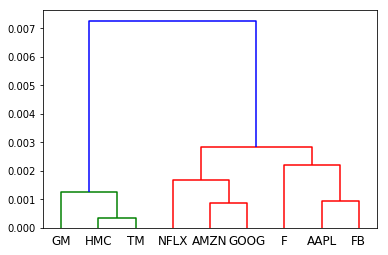

In [112]:
linked = linkage(X, 'complete', metric = 'cosine')
dendrogram(linked, labels=symbols)
plt.show();

## Leaf Contours

Let's load in a dataset containing 2D contours of many samples of leaves coming from 3 different species. The data is saved in a matlab file, so it will take a little bit of work to load it.

In [115]:
import os 
from os.path import dirname, join as pjoin
import scipy.io as sio

mat_fname = 'data/leafContours.mat'

mat_contents = sio.loadmat(mat_fname) # Read the file

Let's take a look at what is contained in the file.

In [116]:
mat_contents

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Wed May  8 12:25:00 2019',
 '__version__': '1.0',
 '__globals__': [],
 'Black': array([[[455.21878882, 446.00032775, 174.0206397 , ..., 124.97761633,
          159.12743598, 412.03650588],
         [423.17217267, 440.00062021, 188.94881579, ..., 145.05922119,
          134.00528709, 406.01097413],
         [396.66134322, 435.00441135, 202.63942075, ..., 161.02015973,
          127.0151071 , 397.61340144],
         ...,
         [539.2276858 , 485.40428465, 236.96336846, ..., 172.7328251 ,
          260.04334384, 453.01220855],
         [513.76428555, 477.00613536, 211.5285588 , ..., 144.01506408,
          226.68252388, 447.43573373],
         [479.        , 467.        , 186.        , ..., 116.        ,
          190.        , 426.        ]],
 
        [[ 64.93981766,  85.53546764, 120.44036561, ..., 143.90978894,
          145.02564757, 107.93727419],
         [ 62.99625326, 119.07092066, 152.26217666, ..., 175.1196

Looks like we need to separate the actual data from the metadata. The types of data in the file are listed under several keys. 

In [117]:
mat_contents.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Black', 'Blue', 'Green', 'leafContours', 'te', 'tr'])

The plane curves we are after are under the 'planarShapes' key. Let's extract that from the mat file.

In [118]:
leafShapes = mat_contents['leafContours']
leafShapes.shape

(2, 100, 179)

To match with our usual convention, we would prefer this to be transposed.

In [119]:
leafShapes = leafShapes.T
leafShapes.shape

(179, 100, 2)

The second command above shows that `leafShapes` is a 2x100x179 array. Exploring more, we would find that there are 179 samples of leaves, each stored as a 2x100 pointcloud.

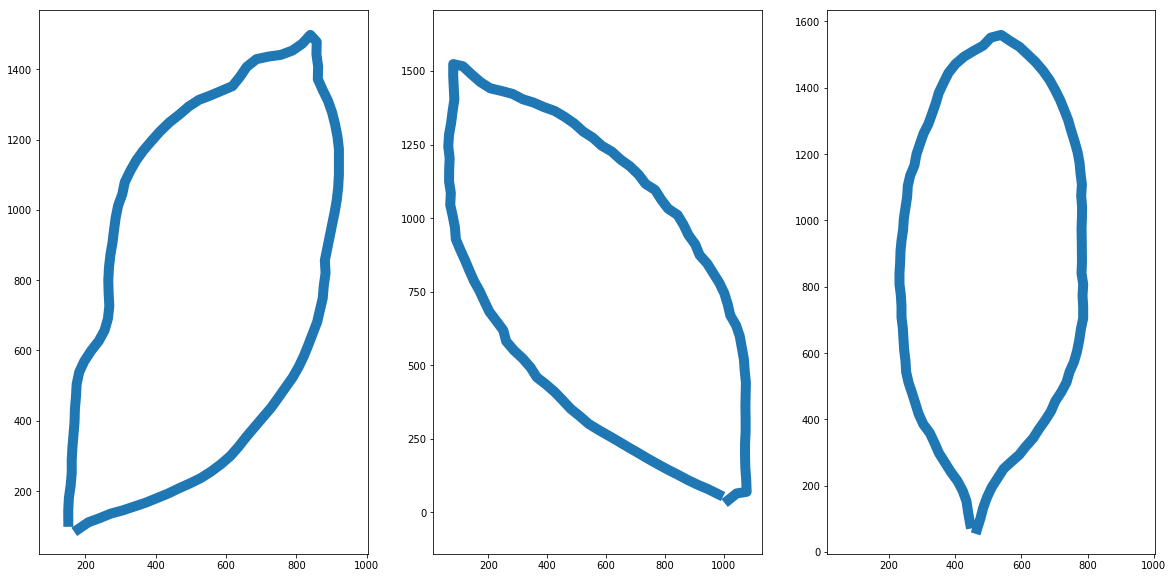

In [120]:
leaves = [leafShapes[125,:,:]] # Pick some shapes.
leaves.append(leafShapes[80,:,:])
leaves.append(leafShapes[1,:,:])

fig = plt.figure(figsize=(20,10))

for j in range(3):
    fig.add_subplot(1,3,j+1)
    plt.axis('equal')
    plt.plot(leaves[j][:,0],leaves[j][:,1],linewidth=10);

We should similarly get the labels from `leafLabels.mat`. The labels are by species of tree the leaf came from.

In [121]:
mat_fname = 'data/leafLabels.mat' 

mat_contents = sio.loadmat(mat_fname) # Read the file

In [122]:
leafLabels = mat_contents['leafLabels']
leafLabels

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2]], dtype=uint8)

### Exercise

Explore this dataset. Can you classify the leaves? Cluster them? Reduce dimension to get a better picture of their distribution? Determine 'within-class variability'? 

You might have to do something tricky to 'vectorize' the data. E.g., the shapes are not preprocessed to be perfectly aligned like MNIST.